#Version 2 k-means con k++

##**Importar librerias**

In [1]:
import numpy as np #Manejo de arreglos  (Algebra Lineal en Python)
import pandas as pd ## Manejo de Dataframes (tipo de datos)
import matplotlib.pyplot as plt # Gráficas
import seaborn as sns # Gráficas estadísticvas (histogramas)
import matplotlib.cm as cm

##**Funciones para graficar**

In [2]:
def graficar_clusters_PCA2D(clusters, metodo, centroids): #Función para graficar los clusters

    # Crear un gráfico de dispersión 2D usando las dos primeras componentes
    plt.figure(figsize=(10, 6)) # Ajustar el tamaño de la figura
    sns.scatterplot(x= x_pca[:, 0], y= x_pca[:, 1], # Crear un gráfico para x_
                    hue=clusters, palette='viridis', # Colores y los clusters
                    alpha=0.6, s = 100)

    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'centroides') # Colores y centoides de los clusters
    plt.title(f'Visualizacion apartir de clusters K++ {metodo}', fontsize=16) #Titulo
    plt.xlabel('Componente Principal 1') #titulo eje x
    plt.ylabel('Componente Principal 2') #titulo eje y
    plt.grid(True) #rejilla
    plt.grid(linestyle = '-', alpha  = 0.5) #Estilo de la rejilla
    plt.legend(title='Cluster') #leyenda y titulo
    plt.show() #Mostrar

In [3]:
from mpl_toolkits.mplot3d import Axes3D

def graficar_clusters_PCA3D(clusters, metodo, centroids): #Función para graficar los clusters

    # Crear una figura 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos en 3D con un borde negro (submarca) y colores según clusters
    scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],
                         c=clusters, cmap='viridis', s=100, alpha=0.6, edgecolor='black')

    # Graficar los centroides
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
               c='black', s=150, label='Centroides', edgecolor='black')

    # Añadir etiquetas
    ax.set_title(f'Visualización 3D de la Clusterización (PCA) {metodo}', fontsize=16) #titulo
    ax.set_xlabel('Componente Principal 1') #Titulo eje x
    ax.set_ylabel('Componente Principal 2') #Titulo eje y
    ax.set_zlabel('Componente Principal 3') #Titulo eje z

    # Añadir leyenda de los clusters usando los elementos del scatter
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)  # Añadir la leyenda de clusters al gráfico

    # Añadir la leyenda de los centroides por separado
    #ax.legend(loc="upper right", title='Centroides')

    # Configurar cuadrícula
    ax.grid(True, linestyle='-', alpha=0.5)

    # Mostrar el gráfico
    plt.show()


##**Implementacion de K-means utilizando la libreria sklearn y el algoritmo K++ para la inicializacion de centroides.**

In [4]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vT_GsMiCteAs0MUDzRzN-Z_z6WBx5-hAlhTJjOLpsrC2HM0UMHbbDpB14u6AGb8f_ek1A5X-lxhuO6K/pub?gid=1130509824&single=true&output=csv'
data= pd.read_csv(url)  ##Con libreria pandas se lee la url y se extrae como 'datos'
data.head() #.head para mostrar el encabezado del codigo

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Preferred foot,Nation,Position
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,5,25,NaN,NaN,NaN,NaN,NaN,Right,France,ST
1,Rodri,91,66,80,86,84,87,85,65,66,...,3,28,NaN,NaN,NaN,NaN,NaN,Right,Spain,CDM
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,3,24,NaN,NaN,NaN,NaN,NaN,Left,Norway,ST
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,4,21,NaN,NaN,NaN,NaN,NaN,Right,England,CAM
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,5,24,NaN,NaN,NaN,NaN,NaN,Right,Brazil,LW


In [5]:
data.shape #.shape para saber las dimensiones

(17737, 48)

In [6]:
data.isna().sum()#saber datos faltantes

,0
Name,0
OVR,0
PAC,0
SHO,0
PAS,0
DRI,0
DEF,0
PHY,0
Acceleration,0
Sprint Speed,0


In [7]:
gk_columns=['GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes']#crear lista que contiene los datos faltantes
# median para sacar la mediana, sort_values orgnizarlo de manera ascendente y index para mostrar solo los encabezados
data[gk_columns]=data[gk_columns].fillna(0)#remplazar los datos faltantes con 0

In [8]:
#Asignamos a X y Y los datos
X=data.iloc[:,1:-1].values
Y=data.iloc[:,-1].values #con el iloc se acceden a los datos, primero filas luego columnas, : en fila significa todas, en columnas desde la 1 hasta la -1, sin inluir la ultima

Y

array(['ST', 'CDM', 'ST', ..., 'CM', 'CM', 'LM'], dtype=object)

In [9]:
### Codificar el pie preferido como variable numérica
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Crear el codificador
le = LabelEncoder()

# Codificar la penúltima columna (Preferred foot)
X[:, -2] = le.fit_transform(X[:, -2])

# Codificar la última columna (Skill moves)
X[:, -1] = le.fit_transform(X[:, -1])

# Verificar los resultados
print(X[:, -2:])  # Imprimir las últimas dos columnas para verificar la codificación

[[1 50]
 [1 128]
 [0 106]
 ...
 [1 146]
 [0 135]
 [0 37]]


In [10]:
df = pd.DataFrame(X) # Convertir 'X' a un DataFrame de pandas

for col in df.columns:# Iterar sobre cada columna del DataFrame

    # Convertir a numérico, forzando errores a NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
from sklearn.impute import SimpleImputer ##Imputar valores faltante

imputer = SimpleImputer(missing_values=np.nan, strategy='median') #A los valores faltantes cambiarlos por la mediana

#Cambio de las variables faltantes por la mediana
imputer.fit(X)
X = imputer.transform(X)
X

array([[ 91.,  97.,  90., ...,   0.,   1.,  50.],
       [ 91.,  66.,  80., ...,   0.,   1., 128.],
       [ 91.,  88.,  92., ...,   0.,   0., 106.],
       ...,
       [ 53.,  60.,  58., ...,   0.,   1., 146.],
       [ 53.,  61.,  52., ...,   0.,   0., 135.],
       [ 53.,  60.,  49., ...,   0.,   0.,  37.]])

##**FUNCION CODO PARA DEFINIR CUANTOS CLUSTER USAR**

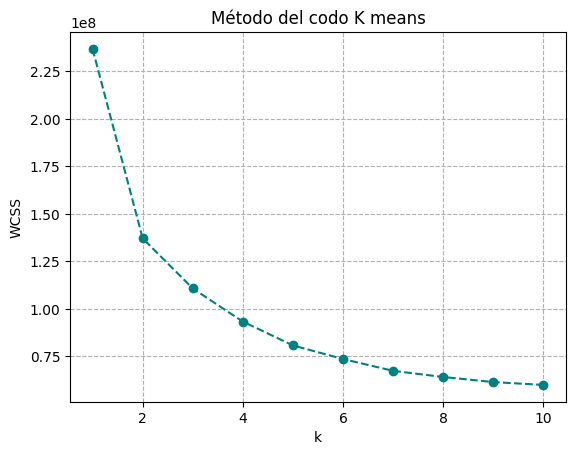

In [12]:
from sklearn.cluster import KMeans
## Inicializo donde almaceno el WCCS(k)
WCSS = []

for k in range(1,11):
  kpp = KMeans(n_clusters= k,
               #init = 'k-means++',
               random_state=42, n_init = 'auto')
  kpp.fit(X)
  WCSS.append(kpp.inertia_)

plt.figure()
plt.plot(range(1,11), WCSS, 'o--', color = 'teal')
plt.title('Método del codo K means')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.grid(True)
plt.grid(linestyle = '--')
plt.show()

##**Preparacion de datos**

**Eliminamos nacionalidad**

In [13]:
#Se elimino la nacionalidad para evitar ruido del grafico
X_ = X[:,:-1]
X_

array([[91., 97., 90., ...,  0.,  0.,  1.],
       [91., 66., 80., ...,  0.,  0.,  1.],
       [91., 88., 92., ...,  0.,  0.,  0.],
       ...,
       [53., 60., 58., ...,  0.,  0.,  1.],
       [53., 61., 52., ...,  0.,  0.,  0.],
       [53., 60., 49., ...,  0.,  0.,  0.]])

In [14]:
from sklearn.impute import SimpleImputer ##Imputar valores faltante

imputer = SimpleImputer(missing_values=np.nan, strategy='median') #A los valores faltantes cambiarlos por la mediana

#Cambio de las variables faltantes por la mediana
imputer.fit(X_)
X_ = imputer.transform(X_)

**PCA**

In [15]:
from sklearn.decomposition import PCA

#Creamos un obnjeto PCA y ajustar los datos
pca= PCA(n_components=3) ##Queremos las tres primeras componente principales
x_pca = pca.fit_transform(X_)

In [16]:
#Verificamos la varianza
varianza = pca.explained_variance_ratio_
print(sum(varianza))

0.839709399866017


##**Algoritmo Kmeans y Kmeans++**

In [17]:
from sklearn.cluster import KMeans #algoritmo clasificacion

kmeans = KMeans(n_clusters=4, random_state=42) #se define el numero de clusters en este caso son 4
clusters = kmeans.fit_predict(X_) #otorgando el N. de etiquedas de n_clusters

In [18]:
from sklearn.cluster import KMeans

kmeans_mas = KMeans(n_clusters=4, random_state=42, init = 'k-means++') #se define el numero de clusters en este caso son 4
clusters_kmeans_mas = kmeans_mas.fit_predict(X_)

**Definimos centroides**

In [19]:
centroides_kmeans_mas = kmeans_mas.cluster_centers_ #centros de los clusters
centroides_kmeans_mas

array([[ 6.58039639e+01,  7.30671115e+01,  6.27686421e+01,
         5.75673077e+01,  6.65661303e+01,  3.32148744e+01,
         6.03475275e+01,  7.31840659e+01,  7.29531005e+01,
         6.43479199e+01,  6.40657378e+01,  6.51361852e+01,
         5.94497645e+01,  5.62496075e+01,  5.93618524e+01,
         5.92382261e+01,  5.41350078e+01,  4.98153454e+01,
         6.19599686e+01,  5.27468603e+01,  5.55781005e+01,
         6.64729199e+01,  7.11840659e+01,  6.95837912e+01,
         6.15011774e+01,  6.63779435e+01,  6.07388148e+01,
         2.95282575e+01,  5.47343014e+01,  3.09636970e+01,
         3.19097331e+01,  2.92580455e+01,  6.61291209e+01,
         6.34425039e+01,  6.21283359e+01,  5.04640895e+01,
         3.12715856e+00,  2.87519623e+00,  2.47327316e+01,
         1.58983937e-13,  9.32587341e-14,  6.15507645e-13,
         3.38395978e-13, -2.94875235e-13,  7.87284144e-01],
       [ 6.54262131e+01,  6.58829415e+01,  6.39144572e+01,
         6.30215108e+01,  6.67453727e+01,  3.58204102e+

In [20]:
centroides_kmeans_mas_pca = pca.transform(centroides_kmeans_mas) #transformar los centroides con pca a los principales
centroides_kmeans_mas_pca

array([[-18.92261285, -51.15290841, -19.91868549],
       [207.53624617, -14.95768587,  30.71744999],
       [  1.7006178 ,  51.9204732 , -17.30972911],
       [-57.46487019,   5.86526214,  22.12620196]])

##**Visualizacion**

**2D**

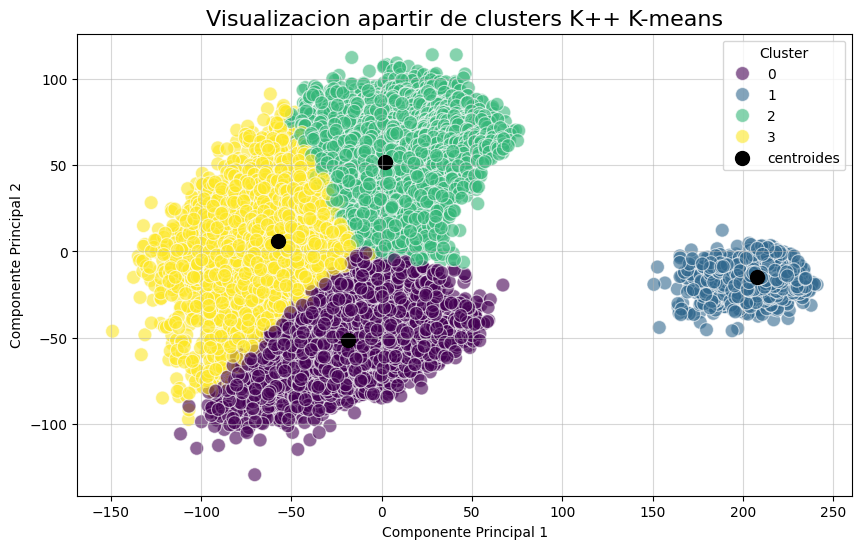

In [21]:
graficar_clusters_PCA2D(clusters_kmeans_mas, 'K-means', centroides_kmeans_mas_pca) ##Graficamos con la funcion que ya teniamos

**3D**

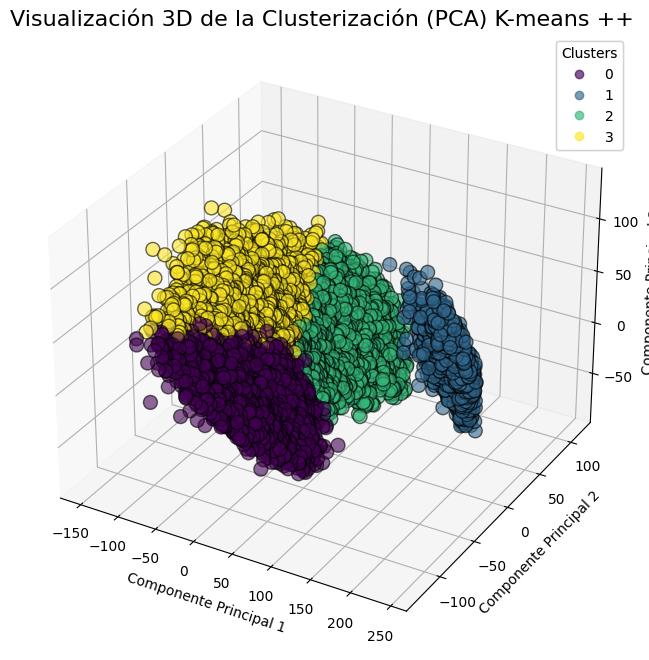

In [22]:
graficar_clusters_PCA3D(clusters_kmeans_mas, 'K-means ++', centroides_kmeans_mas_pca) ##Graficamos con la funcion que ya teniamos